In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
bureau= dd.read_csv("./data/bureau.csv")
a = bureau.shape
print("bureau shape :({},{})".format( a[0].compute(),a[1]))

bureau shape :(1716428,17)


In [3]:
bureau.compute().dtypes.value_counts()

float64    8
int64      6
object     3
dtype: int64

<AxesSubplot:>

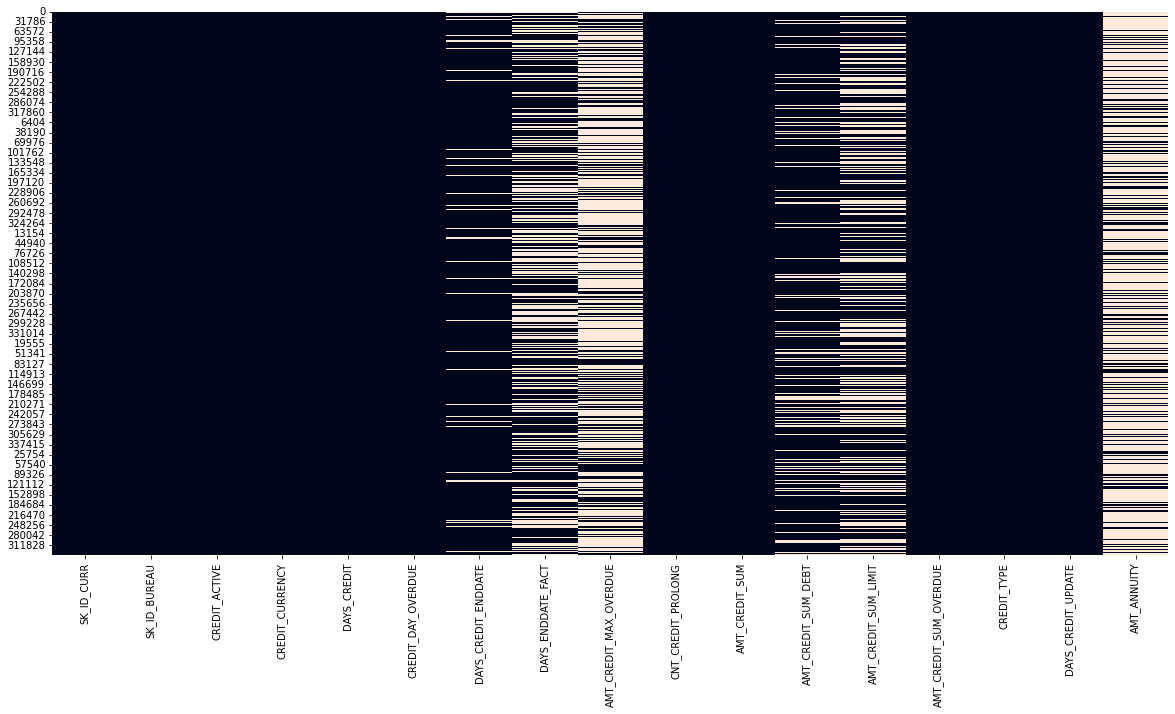

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(bureau.isna().compute(), cbar=False)

In [3]:
(bureau.compute().isna().sum()/bureau.shape[0].compute()).sort_values(ascending=True)

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_UPDATE        0.000000
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
AMT_CREDIT_SUM            0.000008
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
AMT_ANNUITY               0.714735
dtype: float64

In [ ]:
print("Colones vides : [DAYS_CRDIT_ENDDATE , DAYS_ENDDATE_FACT, AMT_CRDIT_MAX_OVERDUE, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_ANNUITY ]")

Colones vides : [DAYS_CRDIT_ENDDATE , DAYS_ENDDATE_FACT, AMT_CRDIT_MAX_OVERDUE, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_ANNUITY ]


In [ ]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

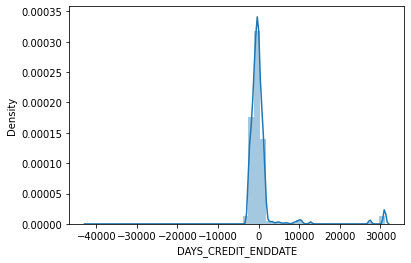

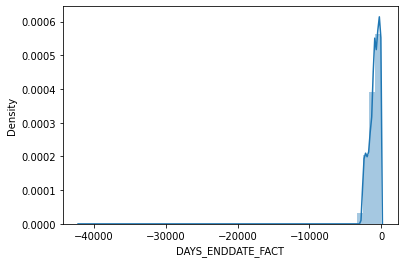

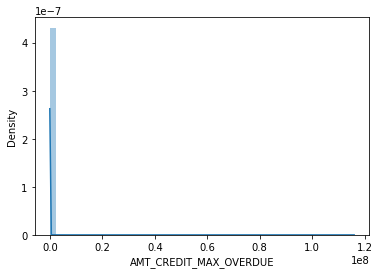

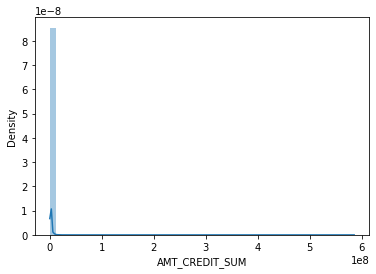

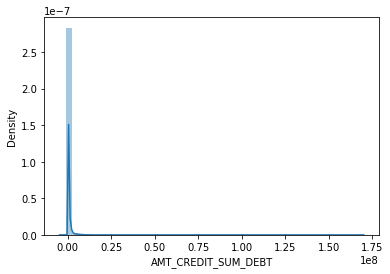

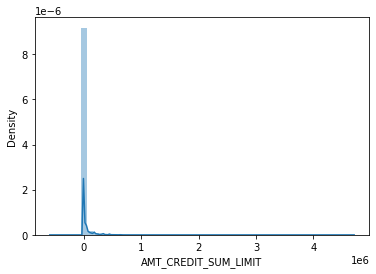

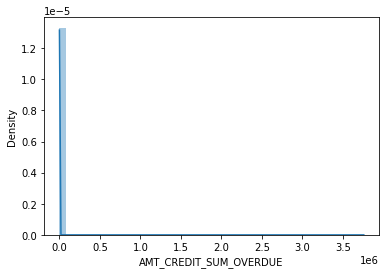

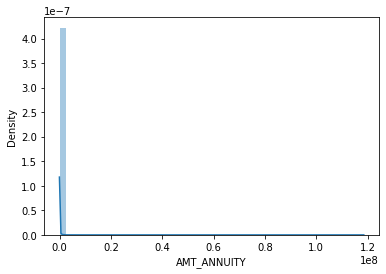

In [ ]:
for col in bureau.compute().select_dtypes('float').columns:
    plt.figure()
    sns.distplot(bureau[col].compute())

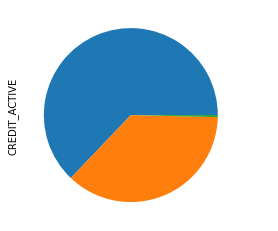

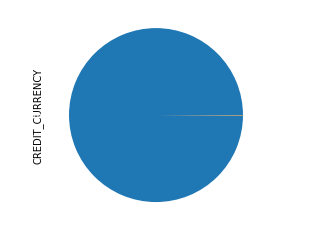

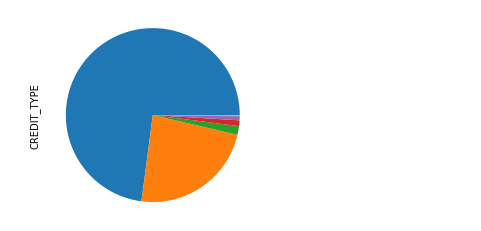

In [ ]:
for col in bureau.compute().select_dtypes('object').columns:
    plt.figure()
    bureau[col].compute().value_counts().plot.pie(textprops={'color':"w"})

In [6]:
l=list(bureau.compute().select_dtypes('float').columns) + list(bureau.compute().select_dtypes('int').columns)

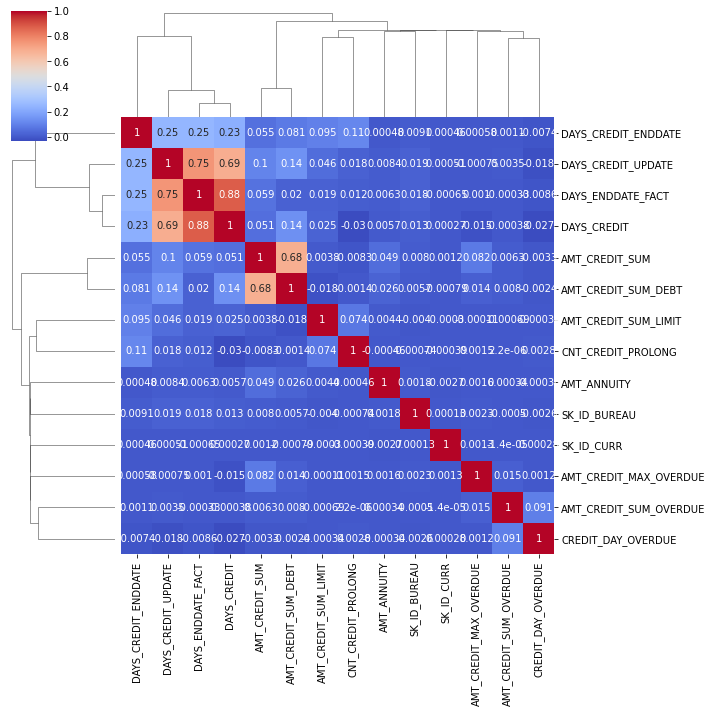

In [7]:
sns.clustermap(bureau[l].compute().corr(),annot=True,cmap='coolwarm')